<a href="https://colab.research.google.com/github/ayankins/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [35]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading the dataset to a Pandas DataFrame

In [36]:
iris_data = pd.read_csv('/content/IRIS.csv')

First 5 rows of the dataset

In [37]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Dataset Rows & Columns count

In [39]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",iris_data.shape[0]) # Use iris_data instead of df
print("Number of columns are: ",iris_data.shape[1]) # Use iris_data instead of df

Number of rows are:  150
Number of columns are:  5


Dataset Information

In [40]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Duplicate Values

In [41]:
dup = iris_data.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


Missing Values/Null Values

In [42]:
iris_data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Understanding The Variables

In [43]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Checking Unique Values for each variable.

In [44]:
iris_data.columns
df = iris_data.columns
for i in df.tolist():
  print("No. of unique values in",i,"is",iris_data[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


Data Wrangling

In [45]:
# as we don't need the 1st column so let's drop that
data = iris_data.iloc[:, 1:]

In [46]:
# New updated dataset
data.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


Data Preprocessing and Feature Engineering

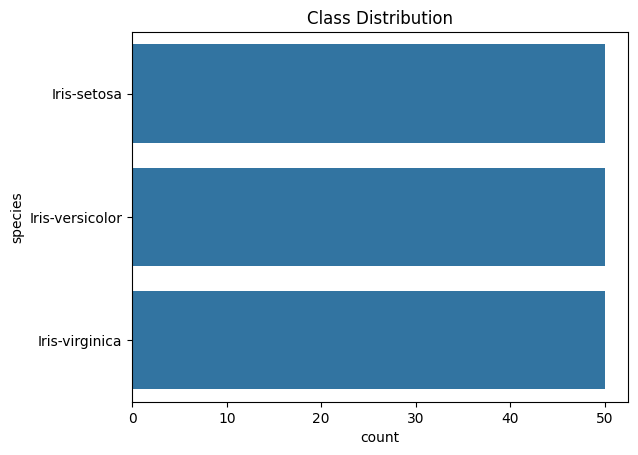

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [47]:
# Check for class imbalance
sns.countplot(data['species'])
plt.title('Class Distribution')
plt.show()

# Encode the target variable
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])
data.head()


Splitting the Data into Training and Testing Sets

In [48]:
# Splitting the data into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Model Implementation and Training

In [49]:
# Initializing the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=500),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Training the models and evaluating performance
results = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = [accuracy, precision, recall, f1]
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n" + "-"*40 + "\n")

# Converting results to DataFrame for better visualization
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
print(results_df)


Results for Logistic Regression:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

----------------------------------------

Results for Decision Tree:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

----------------------------------------

Results for Random Forest:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

----------------------------------------

Results for Support Vector Classifier:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

----------------------------------------

Results for Multi-layer Perceptron:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

----------------------------------------

Results for Naive Bayes:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

----------------------------------------

Results for XGBoost:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

----------------------------------------

                           Accuracy  Precision    Recall  F1 Score
Logistic Re

Hyperparameter Tuning Using GridSearchCV

In [50]:
# Hyperparameter tuning for RandomForestClassifier (example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch for RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_

# Evaluate the best estimator
y_pred_best_rf = best_rf.predict(X_test)
print(f"Best Random Forest Classifier Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Classifier Accuracy: 0.93


Model Evaluation and Results

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



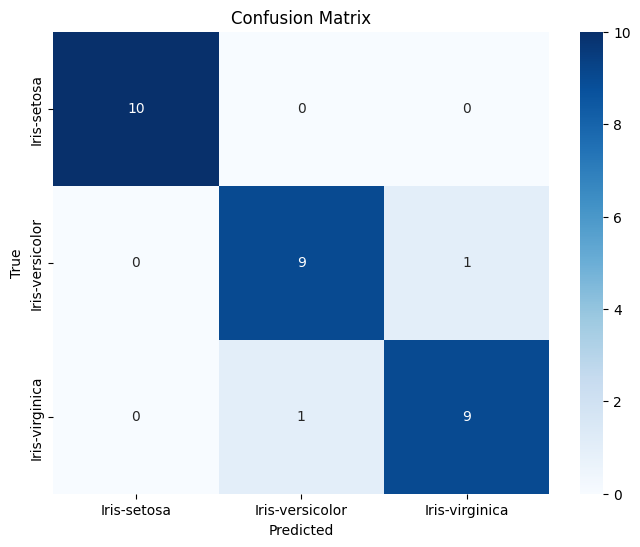

In [51]:
# Confusion matrix and classification report for the best model
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_best_rf, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
